# Project 1: Disruption problem
# Students: Khair Mohamed - El Firdoussi Aymane - Msik Ahmed Amine
# Group W


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal

# All imports go here

# Introduction

In this paper, we will deal with stochastic processes in continuous time.  The aim of this study is to introduce some properties of Poisson processes and to provide the basics to deal with such processes in the case where there is a change of intensity. Our final goal is to predict when there is a change of behaviour of our point process with or without poisson process hypothesis.

# Preparatory work and Assumptions

Imagine that we have events described by a point process 𝑁. At the beginning of the observation, events occur according to a Poisson process of intensity $\lambda_0$ until a time $\tau$, and then switch to a new regime which is still a Poisson process but with intensity $\lambda_1$. We suppose that we know $\lambda_0$ and $\lambda_1$ but not $\tau$. We assume also that $\tau$ follows an exponential distribution of parameter $\sigma$, i.e $\tau \sim \mathcal{E}(\sigma)$. We want to estimate $\tau$ by the observation of a single trajectory.

----
# Question 1:

We define $Z(t) = \mathbb{1}_{ \{\tau \leq t \} }$, and $$ \hat{Z}(t) = \mathbb{E}[Z(t) | \mathcal{F}_t] $$
Where $ \mathcal{F}_t = \sigma(N(s), s \leq t) $

We assume that:

$$ \hat{Z}(t) = \int_0^t h(s)(1 - \hat{Z}(s)) ds + \int_0^t \frac{(\lambda_1 - \lambda_0) \hat{Z}(s)(1 - \hat{Z}(s))}{ \hat{\lambda}(s)} \left( dN(s) -  \hat{\lambda}(s)ds \right) $$


Using the definition of $dN$ (integration with respect to a point process), we can rewrite the above equation as :

$$ \hat{Z}(t) = \int_0^t h(s)(1 - \hat{Z}(s)) ds - \int_0^t (\lambda_1 - \lambda_1)\hat{Z}(s) (1 - \hat{Z}(s)) ds + \sum_{T_n \leq t} \frac{(\lambda_1 - \lambda_0) \hat{Z}(T_n^-) (1 - \hat{Z}(T_n^-))}{\lambda_0 + (\lambda_1 - \lambda_0)\hat{Z}(T_n^-)}$$
Hence, between two jumps of $N$, i.e in $[T_n, T_{n + 1}[$, $\hat{Z}(t)$ is obtained by the equation:

$$ \hat{Z}(t) = \hat{Z}(T_n) + \int_{T_n}^t (h(s) - (\lambda_1 - \lambda_0) \hat{Z}(s)) (1 - \hat{Z}(s)) ds $$ 
Or equivalently, $\hat{Z}$ satisfies the follwoing differential equation between its jump times:

$$ z'(t) =  (h(t) - (\lambda_1 - \lambda_0) z(t)) (1 - z(t)) $$

And in the n-th jump moment $T_n$, there is a discontinuity in $\hat{Z}(t)$ of amplitude:

$$ \hat{Z}(T_n) - \hat{Z}(T_n^-) = \frac{(\lambda_1 - \lambda_0)\hat{Z}(T_n^-)(1 - \hat{Z}(T_n^-))}{\lambda_0 + (\lambda_1 - \lambda_0) \hat{Z}(T_n^-)} $$

----

# Question 2:

Given a discrete process $(\xi_n)_{n \in \mathbb{N}}$ where $\forall n \in \mathbb{N}$ $\xi_n \sim \mathcal{E}(\lambda)$, we can generate a Poisson process of intensity $\lambda$ by defining the arrival times:

$$ T_0 = 0;  T_{n + 1} = T_n + \xi_n $$
or equivalently $$ T_{n + 1} = \sum_{k = 0}^n \xi_k $$

We define the number of arrivals before time $t \in \mathbb{R}$ by:

$$ N(t) = \sum_{n \in \mathbb{N}^+} \mathbb{1}_{ \{T_n \leq t\} }$$

We will generate poisson processes in this study thanks to this definition. 

We recall that we consider two independent Poisson processes with respective intensities $\lambda_0$ and $\lambda_1$. Initially, we only observe the first one, and after a random instant $\tau$, independent of the two processes, we observe the second one. This process can be generated using the follwing function called **poisson_process**, which takes in parameters:
- lam0 : which denotes $\lambda_0$
- lam1 : $\lambda_1$
- tau : the time $\tau$
- limit : the final desired instant

In [3]:
def poisson_process(lam0, lam1, tau, limit = None):
    # T is the jump times process
    #limit is used when we want to have a point process that stops at a given time
    T = [0]
    xi = np.random.exponential(scale = 1 / lam0)
    t = xi
    while t < tau:
        T.append(t)                                          
        t += np.random.exponential(scale = 1 / lam0)
    
    t = tau
    if limit != None:
        while t < limit:
            t += np.random.exponential(scale = 1 / lam1)
            T.append(t)
        return T
    n = len(T)
    for i in range(n):
        t += np.random.exponential(scale = 1 / lam1)
        T.append(t)
    
    return T

In [4]:
# Defining the function N which counts the number of arrivals up to time t
def num_arrivals(T, t):
    return np.sum(np.array(T) <= t)

### Plotting a sample path of the Poisson process N

Hence, we are now able to generate a point process modelling our problem. 

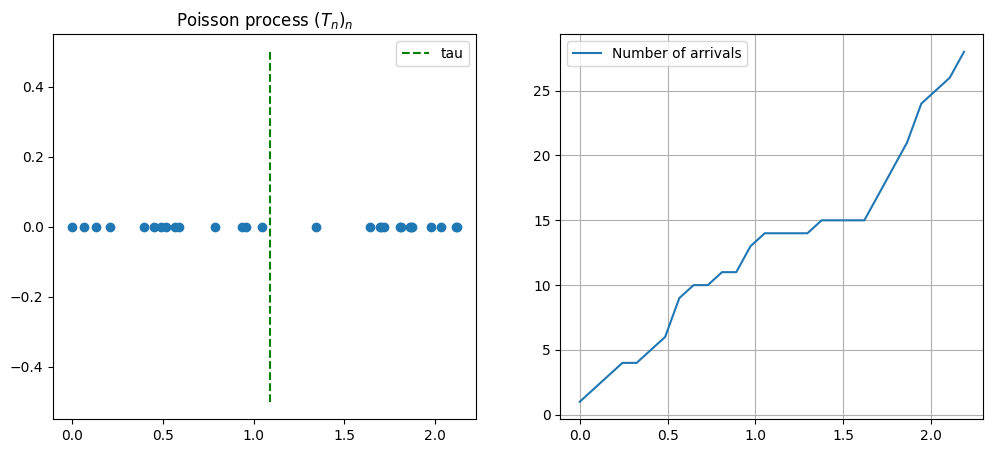

In [5]:
# Parameters
lam0 = 10
lam1 = 20
tau_ = np.random.exponential(scale = 2)

# Point process
T_ = poisson_process(lam0, lam1, tau_)

# Plotting the point process and the number of arrivals
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot of the jump times
axs[0].scatter(T_, np.zeros(len(T_)))
axs[0].set_title('Poisson process $(T_n)_n$')
axs[0].plot([tau_, tau_], [-0.5, 0.5], linestyle='--', label = 'tau', c = 'g')
axs[0].legend()

# Plot the number of arrivals
t = np.linspace(0, 2 * tau_, len(T_))
N = []
for x in t:
    N.append(num_arrivals(T_, x))
axs[1].plot(t, N, label = 'Number of arrivals')
axs[1].set_title('')
axs[1].grid()
axs[1].legend()


## Simulating a sample trajectory of $\hat{Z}$

### Rectangles' method: 

If we partition each interval [$T_n, T_{n + 1}$[ into $p$ sub-intervals with equal size, then we obtain points $(t_i)_{i = 0}^{p}$ where $t_{n,0} = T_n$, $t_{n,1} = T_n + \epsilon$, $t_{n,2} = T_n + 2 \epsilon$,...., $t_{n,k} = T_n + k \epsilon$ until $t_{n,p - 1} = T_{n + 1} - \epsilon$, where $ \epsilon = \frac{T_{n + 1} - T_n}{p}$

Then using this, we approximate the integral in the expression of Question 1 with the rectangles method, and we obtain: 
$ \forall k \in \{0, ..., p - 2 \} $

$$ \hat{Z}(t_{n, k+1}) =  \hat{Z}(T_n) + \epsilon \sum_{l = 0}^{k}  ( h(t_{n, l}) - (\lambda_1 - \lambda_0) \hat{Z}(t_{n, l}))(1 - \hat{Z}(t_{n, l})) $$

By developping the calculus, we find the induction relation:

$$ \hat{Z}(t_{n, k+1}) = \hat{Z}(t_{n, k}) + \epsilon (h(t_{n, k}) - (\lambda_1 - \lambda_0) \hat{Z}(t_{n, k}))(1 - \hat{Z}(t_{n, k})) $$

And since $\tau \sim \mathcal{E}(\sigma)$, we find by simple calculation that: 
$$ h(s) = \frac{\sigma e^{- \sigma s}}{e^{- \sigma s}} = \sigma $$

Therefore, the induction relation reduces to :
$$ \hat{Z}(t_{n, k+1}) = \hat{Z}(t_{n, k}) + \epsilon (\sigma - (\lambda_1 - \lambda_0) \hat{Z}(t_{n, k}))(1 - \hat{Z}(t_{n, k})) $$

To compute these quantities, we will create a table (called Z in the code) for which we have : $(Z)_{i, j} = \hat{Z}(t_{i, j})$ for $i  \in \{0, ..., n - 1 \}$ and $j  \in \{0, ..., p - 1 \}$, where $n$ is the total number of jumps generated. This is implemented in the following function called **generate_Z_hat**.

The table U in the code records the instants $t_{n, k}$ where we computed the values of $\hat{Z}$.


In [6]:
def generate_Z_hat(T, p, sigma, lam0, lam1):
    n = len(T)
    
    # Z is a table that will contain in each row the values of the process in [T_n, T_{n + 1}[
    Z = np.zeros((n, p))
    
    # U will contain the table of instants that we calculated Z^ in
    U = np.zeros((n, p))
    
    # Initialization: row 0
    # step-size of the rectangle's method
    eps =(T[1] - T[0]) / (p + 1)

    # first instant
    u = T[0]
    U[0, 0] = u
    for j in range(p - 1):
        # rectangle method
        Z[0, j + 1] = Z[0, j] + eps * (sigma - (lam1 - lam0) * Z[0, j]) * (1 - Z[0, j])
        u += eps
        U[0, j + 1] = u
        
    # Values for t in [T_i, T_{i + 1}[
    for i in range(1, n - 1):
        eps = (T[i + 1] - T[i]) / (p + 1)
        u = T[i]
        U[i, 0] = u
        # computing the value Z^(T_i) using the transition expression (jump size)
        Z[i, 0] = Z[i - 1, p - 1] + ((lam1 - lam0) * Z[i - 1, p - 1] * (1 - Z[i - 1, p - 1])) / (lam0 + (lam1 - lam0) * Z[i - 1, p - 1])
        
        # computing Z[i, j] = Z^(t_{i, j})
        for j in range(p - 1):
            Z[i, j + 1] = Z[i, j] + eps * (sigma - (lam1 - lam0) * Z[i, j]) * (1 - Z[i, j])
            u += eps
            U[i , j + 1] = u
            
    # Last row: beyong the last arrival time, we will just compute the value
    u = T[n - 1] + 1 / lam1
    eps = 1 / (lam1 * (p + 1))
    for j in range(p):
        U[n - 1 , j] = u
        Z[n - 1, j] = Z[n - 2, p - 1] + ((lam1 - lam0) * Z[n - 2, p - 1] * (1 - Z[n - 2, p - 1])) / (lam0 + (lam1 - lam0) * Z[n - 2, p - 1])
        u += eps   
    return Z, U

## Plotting results

Now that we have defined how to generate a trajectory of $\hat{Z}$, we will plot one to see how it evolves in function of t.

In [7]:
# Parameters
p = 200
lam0 = 1
lam1 = 20
sigma = 0.01
tau = np.random.exponential(scale = 1 / sigma)

# Simulating T and Z
T = poisson_process(lam0, lam1, tau)
Z, U = generate_Z_hat(T, p, sigma, lam0, lam1)

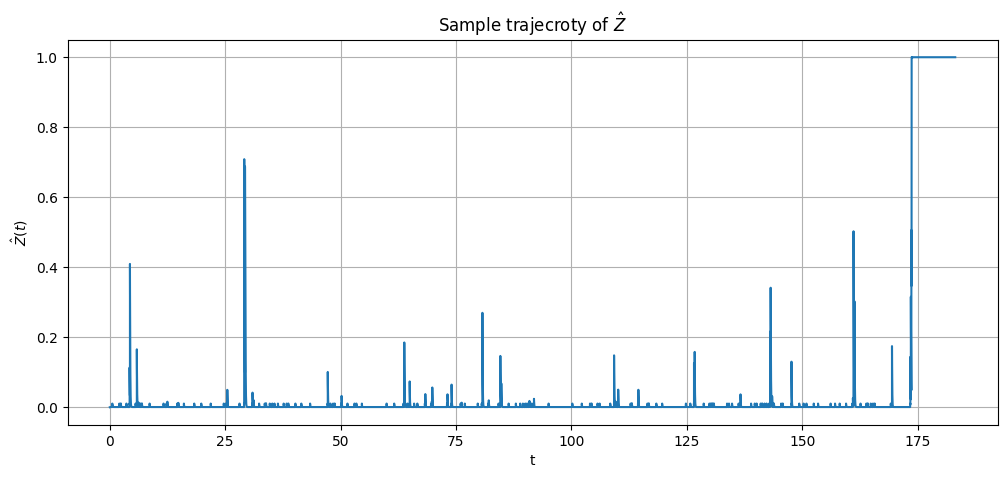

In [8]:
plt.figure(figsize = (12, 5))
Z_flat = Z.reshape(1, -1)[0]
U_flat = U.reshape(1, -1)[0]
plt.plot(U_flat, Z_flat)
plt.title("Sample trajecroty of $\hat{Z}$")
plt.xlabel('t')
plt.ylabel('$\hat{Z}(t)$')
plt.grid()
plt.show()

### Remark about the values of $\lambda_0$, $\lambda_1$ and $\sigma$

- We observe that if the values of $\lambda_0$ and $\lambda_1$ are close to each other, it is hard to distiguish between the points that were generated using the inter-arrival law $\mathcal{E}(\lambda_0)$ and those of $\mathcal{E}(\lambda_1)$, therefore it can be more difficult to estimate the value of $\tau$ if these values are not far enough from each other (we won't be able to see the jump from low values of $\hat{Z}$ to 1).

- We observe as well that if we want to generate a lot of points with the intensity $\lambda_0$, one should have $\sigma$ << $\lambda_0$, so that the comparison between the means is : $\frac{1}{\sigma}$ >> $\frac{1}{\lambda_0}$. 

Now we will see how we can estimate $\tau$ using a trajectory of $\hat{Z}$.

----

# Question 3: Estimating $\tau$ using a sample trajectory of $\hat{Z}$

We know that $\hat{Z}$ represents the quantity: 
$$ \hat{Z}(t) = \mathbb{P}[\tau \leq t | \mathcal{F}_t] $$

And threfore, we have that $\forall \epsilon > 0$  $\hat{Z}(\tau + \epsilon) = \mathbb{P}[\tau \leq \tau + \epsilon | \mathcal{F}_t] = 1$, therefore and estimation of $\tau$ could be the first instant of time t for which $ \hat{Z}(t) \geq 0,99$.(Which is equivalent to chosing the first instant where the probability is equal to 1 in Python).

To implement this estimator, we created a function **closest(t, T)** that returns the integer $n$ for which: $t \in [T_n, T_{n + 1}[ $, and then we defined the function **tau_estimation** that returns the desired instant. 

In [9]:
def closest(t, T):
    if t >= T[-1]:
        return len(T) - 1
    
    idx = 0
    while T[idx + 1] < t:
        idx += 1
    return idx   

In [10]:
# Estimation of tau
def tau_estimation(Z, U, threshold=0.99):
    # We will return the value in U for which the proba is close to 1
    n = closest(threshold, Z)
    return U[n]

In [11]:
print("The estimation of the value of tau " + str(tau) + " is " + str(tau_estimation(Z_flat, U_flat)))

The estimation of the value of tau 173.39409496170313 is 173.7029877266568


### Comment on this first method:
This method returns a very good approximation of $\tau$. However, as we said in the above remark, if the values of $\lambda_0$ and $\lambda_1$ are so close to each other, then the estimation of $\tau$ using this method can fail to predict $\tau$.

### Improving this method:
We observe that the generated trajectory $\hat{Z}$ contains a lot of jumps, and this could impact the reliability of our method. In fact, if there exists a small neighborhood of t, say $[t - \epsilon, t + \epsilon]$ in which $\hat{Z}$ does a very big jump (for example goes to 1 and then vanishes to a small value again), then our method will return this instant t, knowing that this is not even close to $\tau$.

Therefore, we can improve this method in two different ways:
- Algorithmic way: we can verify that when we return an estimation $\hat{\tau}$, the value of $\hat{Z}$ does not vanish to a low value, i.e we verify that: $\forall t \geq \hat{\tau}$, $\hat{Z}(t) \geq 0,9$, and in this way we are sure that we returned the instant of the desired jump.
- Mathematical way: we can use a filter (with the library scipy) to delete the noise, and therefore to have a single big jump, which will be the desired one.

Here we will implement only the second method.

In [12]:
# Defining the improved estimator
def tau_estimation_filtered(Z, U):
    # parameters of our filter (from scipy)
    b, a = signal.butter(3, 0.005)
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, Z, zi=zi * Z[0])
    #z = signal.filtfilt(b, a, Z)
    plt.figure(figsize=(12, 6))
    plt.plot(U, z, label = 'filtered trajectory of $\hat{Z}$')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('$\hat{Z}(t)$')
    plt.grid()
    plt.show()
    return tau_estimation(z, U)

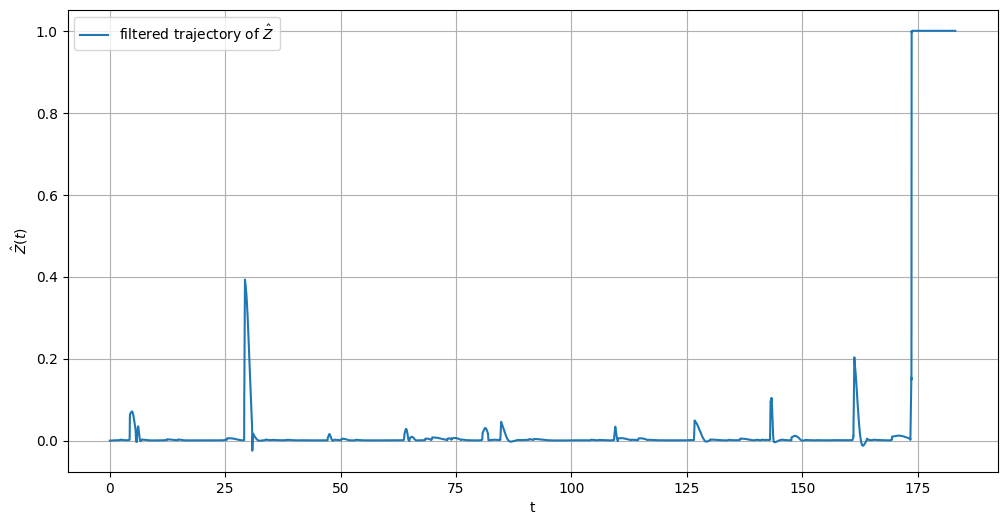

The estimation of tau 173.39409496170313 is 173.71511185029414


In [13]:
print("The estimation of tau " + str(tau) + " is " + str(tau_estimation_filtered(Z_flat, U_flat)))

----
## Question 4: Other methods for estimating $\tau$

## 4.a - First method: Optimization

Now we will implement a new method to estimmate $\tau$ that is based on an optimization problem as those in Machine Learning. The principle is the following:
- We will define a "loss function" that we will minimize, and for which this minimum is an approximation of $\tau$.

We know that if we have a Poisson process N, $$ \frac{\lambda t}{N_t} \longrightarrow 1 $$
Therefore, we can estimate $\lambda_0$ using $ \frac{N_t}{t}$ and the loss function that we will take for this estimation as the squared-loss: 
$ \left( 1 - \frac{\lambda_0 t}{N_t} \right)^2$

And because our process always starts by generating points with the intensity $\lambda_0$, and then with $\lambda_1$, we will also add to our loss the one related to the estimation of $\lambda_1$, and finally we get our final loss function:

$$ L_2(t) = \left( 1 - \frac{\lambda_0 t}{N_t} \right)^2 + \left( 1 - \frac{\lambda_1 (T_N - t)}{N - N_t} \right)^2  $$
where $T_N$ is the last instant generated of our process, and $N$ is the total number of arrivals.

This loss function takes into account both the estimation of $\lambda_0$ and of $\lambda_1$.

We will see in the following examples that by minimizing this function, we get some good estimations of $\tau$ as expected.
We called this loss **L2_loss** because it computes the squared error.
We will also define the **L1_loss** to compare these two methods.

$$ L_1(t) = \lvert 1 - \frac{\lambda_0 t}{N_t} \rvert + \lvert 1 - \frac{\lambda_1 (T_N - t)}{N - N_t} \rvert  $$ 

In [14]:
# Defining our loss fucntions
def L2_loss(t, T, lam0, lam1):                        
    Nt = num_arrivals(T, t)
    N = len(T)
    return (1 - (lam0 * t) / Nt)**2 + (1 - (lam1 * (T[-1] - t))/(N - Nt))**2

def L1_loss(t, T, lam0, lam1):                        
    Nt = num_arrivals(T, t)
    N = len(T)
    return abs(1 - (lam0 * t) / Nt) + abs(1 - (lam1 * (T[-1] - t))/(N - Nt))


In [15]:
# Estimating tau by minimizing this loss
def tau_estimation_optim(T, lam0, lam1, loss='L2'):
    l = np.linspace(1,T[-2],200000)
    if loss == 'L2':
        u = [ L2_loss(t, T, lam0, lam1) for t in l ]
        label = 'L^2'
    elif loss == 'L1':
        u = [ L1_loss(t, T, lam0, lam1) for t in l ]
        label = 'L^1'


    # Plotting the loss function
    plt.figure(figsize=(12, 6))
    plt.plot(l, u, label = '$'+ label + '$' + ' Loss')
    plt.title('$'+ label + '$' + ' loss function')
    plt.xlabel('t')
    plt.ylabel("loss")
    plt.legend()
    plt.show()
    return l[np.argmin(u)]


### Estimation of $\tau$ using this method


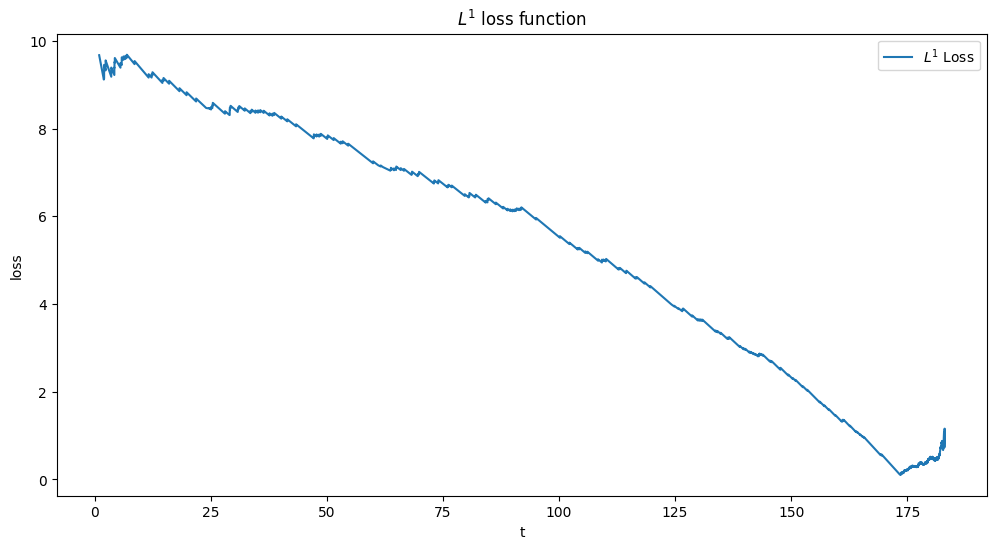

The estimation of the value of tau 173.39409496170313 is 173.42934113605548


In [16]:
print("The estimation of the value of tau " + str(tau) + " is " + str(tau_estimation_optim(T, lam0, lam1, 'L1')))

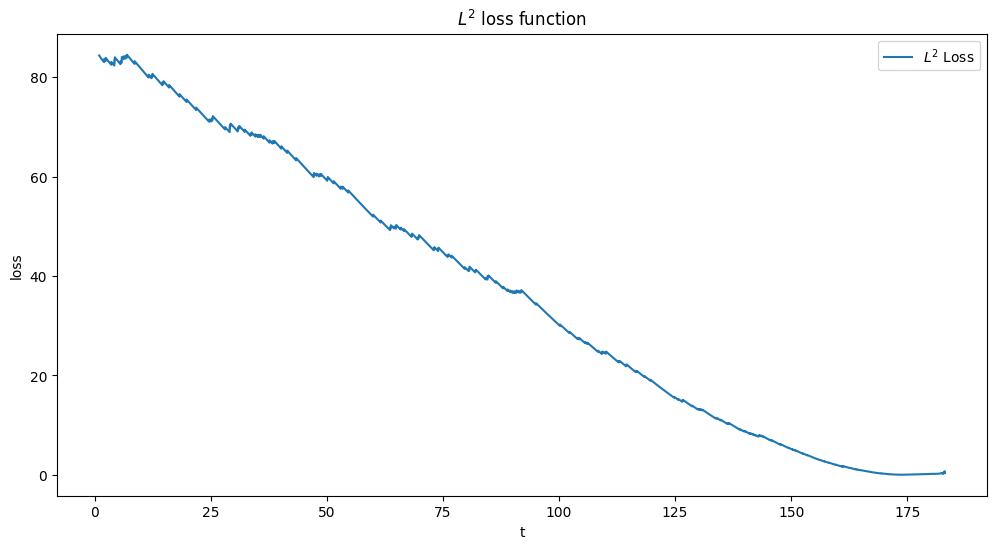

The estimation of the value of tau 173.39409496170313 is 173.42934113605548


In [17]:
print("The estimation of the value of tau " + str(tau) + " is " + str(tau_estimation_optim(T, lam0, lam1, 'L2')))

## Generalization of the last method to all point processes
We get very good results thanks to the optimisation of these loss functions, with L1 performing slightly better (visually). Their performances are close to those of our first method using $\hat{Z}$ (implemented in question 3) in the majority of cases.

So, we seek to generalize this method for any point process. The hypothesis of this case is that $N_t$ is a process with a compensator y until a time $\tau$, then the compensator switches into yy i.e. disruption at $\tau$.

This gives that $N(t) − y(N, t)$ is a is a local martingale for $ t \in [0, \tau]$. Then, $\mathbb{E}[N(t) − y(N, t)] = \mathbb{E}[N(0) − y(N, 0)] = 0$.


So, $\mathbb{E}[N(t)] = y(N, t)$.

And it also gives that $(N(t) - N(\tau)) − (yy(N, t) - yy(N, \tau))$ is a is a local martingale for $ t \in [\tau, T]$. Then, $\mathbb{E}[(N(t) - N(\tau)) − (yy(N, t) - yy(N, \tau))] = \mathbb{E}[(N(\tau) - N(\tau)) − (yy(N, \tau) - yy(N, \tau))] = 0$.


So, $\mathbb{E}[N(t) - N(\tau)] = yy(N, t) - yy(N, \tau)$.

Notice that $yy(N, \tau) = y(N, \tau)$ due to the continuity of the compensator of the overall point process $N_t$.

Thus, the formula that we used in the case of the Poisson Process:

$$ \frac{\lambda t}{N_t} \longrightarrow 1 $$ 
becomes (we assume it since it works for Poisson processes)

$$ \frac{y(N, t)}{N(t)} \longrightarrow 1 $$

and 

 
$$ \frac{yy(N, t) - yy(N, \tau)}{N(t) - N(\tau)} \longrightarrow 1 $$

And because our process always starts by generating points with the intensity $\lambda_0$, and then with $\lambda_1$, we will also add to our loss the one related to the estimation of $\lambda_1$, and finally we get our final loss function:

$$ L_2(t) = \left( 1 - \frac{y(N, t)}{N_t} \right)^2 + \left( 1 - \frac{yy(N, T_N) - yy(N, t)}{N - N_t} \right)^2  $$
where $T_N$ is the last instant generated of our process, and $N$ is the total number of arrivals.

We called this loss **L2_loss** because it computes the squared loss.
We will also define the **L1_loss**.

$$ L_1(t) = \lvert 1 - \frac{y(N, t)}{N_t} \rvert + \lvert 1 - \frac{yy(N, T_N) - yy(N, t)}{N - N_t} \rvert  $$

We expect to get some good estimations of $\tau$. Because as as a large number of points is generated, the minimizer of these loss functions tends to $\tau$.

Notice that for $y(t)= \lambda _1 \times t$ and $yy(t)- yy(\tau) = \lambda _2 \times (t -  \tau) $, we get the same result as before in the case of Poisson Process.

As the compensator being non determenistic, it is hard to study the Point Process, we will assume that N is non homogeneous Poisson Process, i.e. $$y(N,t)=y(t)$$

And the same for $yy$.

To generate non homogeneous Poisson Process Y(t) with compensator y(t), we have from the course that $Y(t)= Z(y(t))$, where Z is PP(1).

----
## 4.b - Second method: Monte-Carlo estimator

The idea explored in this part is that the function "generate_Z_hat" generates random variables and we have that:


$$ \hat{Z}(t) = \mathbb{E}[\mathbb{1}_{ \tau \leq t} | \mathcal{F}_t] $$

$$ \mathbb{E}[\hat{Z}(t)] = \mathbb{P}[\tau \leq t] $$ 

A good idea to estimate the expectation of random variables is to use the law of large numbers. We suppose that we deal with integrable variables. Then we do the Monte-Carlo estimation of this expectation, and we find the time $t$ for which we move from 0 to 1. 
Why 0 and 1? Since the time $\tau$ is already set before the generation of the $\hat{Z}(t)$, we get that the event $ \tau \leq t$ is either of probability 1 or 0. So we will vary the variable t to see where our limit will become 1.

Hence, we will define a function called **Z_hat** that computes the value of $\hat{Z}(t)$ for every $t \in \mathbb{R}$ using the rectangles' method as before. After that, we will estimate $\tau$ by taking some instant in which the Monte-Carlo estimator jumps from 0 to 1.

In [19]:
def Z_hat(t, Z, T, p):
    
    # We need to find the T_n such that t is in [T_n, T_{n + 1}]
    n = closest(t, T)
    z = Z[n, 0]
    
    # Computing the integral with the method of rectangles
    eps =(t - T[n]) / p
    for j in range(p - 1):
        z += eps * (sigma - (lam1 - lam0) * z) * (1 - z)
    return z

In [20]:
# The estimator of tau
def monte_carlo(t, n, tau, lam0, lam1, sigma, p):
    """ N is the number of all points of the Poisson Process with the second intensity
        n : the integer in the Monte-Carlo estimation
    """
    z_mean = 0
    for i in range(n):
        T = poisson_process(lam0, lam1, tau, 2 * tau)
        Z, U = generate_Z_hat(T, p, sigma, lam0, lam1)
        z_mean += Z_hat(t, Z, T, p)
    return z_mean / n

The estimation of tau 9.524295321980519 using this method is 9.852719298600537


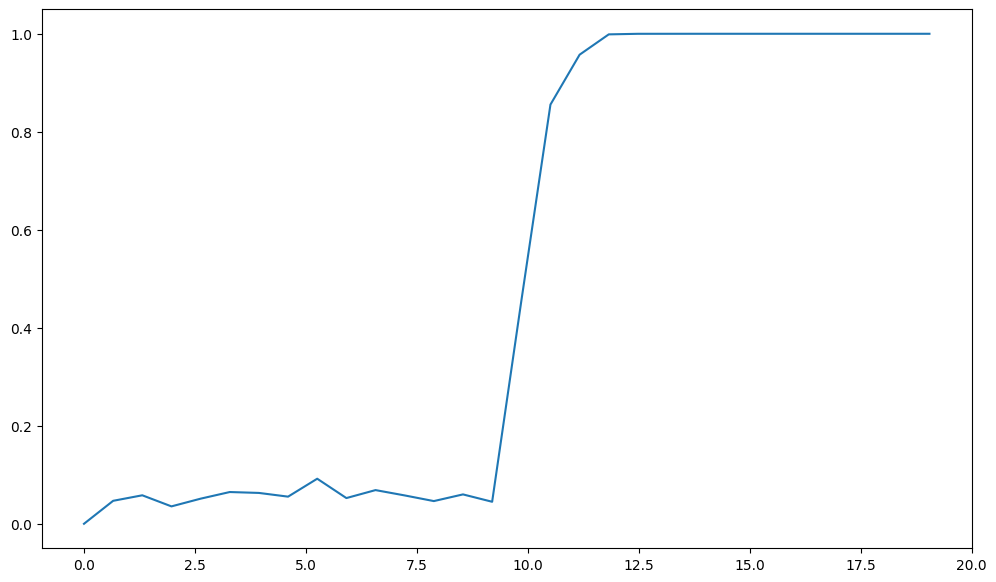

In [22]:
# Parameters
n = 100
p = 50
lam0 = 2
lam1 = 10
sigma = 0.1
tau = np.random.exponential(scale = 1 /sigma)

t = np.linspace(0, 2 * tau, 30)

values = []
for r in t:
    result = monte_carlo(r, n, tau, lam0, lam1, sigma, p)
    values.append(result)
# Estimation of tau
print("The estimation of tau " + str(tau) + " using this method is "+ str(t[closest(0.5, values)]))

plt.figure(figsize=(12, 7))
plt.plot(t, values)
plt.show()

We observe that the graph is indeed less impacted by fluctuations as in the case in question 3 where we only studied one point process, and the estimation is close to the true value of $\tau$.

----

## 4.c - Third method: Local estimation of poisson processes' intensity
 

The underlying idea is to divide a point process and study the intensity in every subinterval. We compare this value with the $\lambda_0$ and $\lambda_1$. Then, we plot a graph of the closest $\lambda \in \{ \lambda_0, \lambda_1 \}$  in function of the interval. We aim to find a graph where there will be a jump at one point of time. We will assume that this jump corresponds to the value of $\tau$.

We will use a multiple point processes in order to have jumps in all subintervals. In the case of one point process, we have intervals without any jumps: in this case, the closest $\lambda$ is always the lower one even for intervals after $\tau$.

In [23]:
# Parameters
lam0 = 10
lam1 = 100
sigma_1 = 1/45
tau_1 = np.random.exponential(scale = 1 / sigma_1)
n=1000

T_list = [] 
maximum = 0 # to store the maximum of all our point processs
for i in range(n): #here we generate n point processes to avoid having intervals with no jumps
    T_i = poisson_process(lam0, lam1, tau_1)
    a = T_i[-1]
    if a > maximum :
        maximum = a
    T_list.append(T_i)  
print(tau_1)

23.01839016822515


Since we have that $\frac{N_t}{t} \longrightarrow \lambda$, the intensity used to choose lambda in an interval is $$ \frac{N_t}{t}. $$ We use the function **point_process_intensity_interval** to compute it.

In [24]:
def point_process_intensity_interval(a, b, T):
    """
    Parameters:
        T: List of jump times of the point process.
        a: Beginning of the time interval.
        b: End time of the time interval.
    """
    count = 0
    for i in range(len(T)-1):
        if a < T[i] <= b:
            count += 1
    if b > T[-1]:
        count += 1 
    mean = count / (b - a)
    return mean



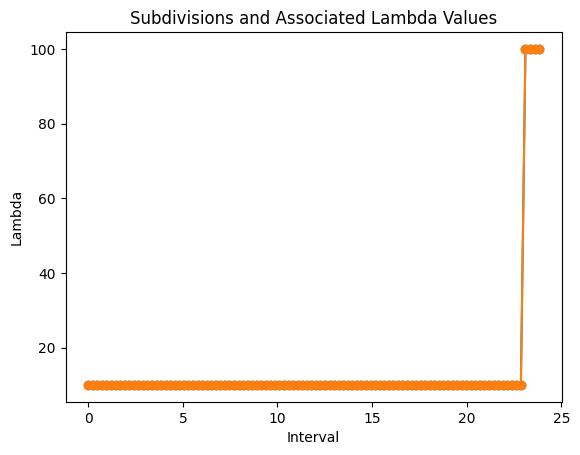

In [26]:
subdivisions = 100 # Number of subdivisions
subdivision_size = (maximum -2) / subdivisions 
     

subdivision_bounds = []
lambda_values = []

for i in range(subdivisions):
    left = i * subdivision_size
    right = (i + 1) * subdivision_size

    intensity = 0
    for j, T_i in enumerate(T_list):
        intensity += point_process_intensity_interval(left, right, T_i)
    intensity /= n

    if abs(intensity - lam0) < abs(intensity - lam1):
        lambda_interval = lam0
    else:
        lambda_interval = lam1

    subdivision_bounds.append((left, right))
    lambda_values.append(lambda_interval)


x = []
for left, _ in subdivision_bounds:
    x.append(left)

y = lambda_values
plt.plot(x, y, marker='o')
plt.plot(x, y, marker='o')
plt.xlabel('Interval')
plt.ylabel('Lambda')
plt.title('Subdivisions and Associated Lambda Values')
plt.show()

Now we will estimate $\tau$ as an instant in the jump in the previous graph.

In [47]:
change_point = None
pv = lam0
for i in range(1, len(subdivision_bounds)):
    cur = lambda_values[i]
    if cur != pv:
        change_point = subdivision_bounds[i][0]
        print("The estimation of the value of tau " + str(tau_1) + " is " + str(change_point))
    pv = cur

The estimation of the value of tau 5.0858860249907165 is 4.8


It seems like a very good estimation for $\tau$. We are able to gain more precision by increasing the number of subdivisions, but at one point if their lenghts are too small, it's not going to work. In fact, there will be less and less jumps (sometimes even 0): these are the cases we want to avoid.

Another condition that we need to precise: to guarantee that this method will work correctly, the values of $\lambda_0$ and $\lambda_1$ should be widly different, otherwise the estimators could be close to each other, and we would have a lot of jumps in the graph.

### Example: Call center and electrical Shutdown

Imagine, you work on a call center for an IT Company delivering servers and that an electrical shutdown happens at a time $\tau$ that follows an exponenital law. The arrival of incoming calls can be inferred as a poisson process which intensity will change depending on the situation. Let's see if we can predict the time when the electrical shutdown happened thanks to the phone calls registered in the call center. 

We have chosen to stop at minute 480 assuming that a regular day of work lasts 8 hours (8x60 = 480).

In [41]:
# Parameters
lam0 = 10
lam1 = 100
sigma_1 = 1/20
tau_1 = np.random.exponential(scale = 1 / sigma_1)
n=100

maximum = 0 # to store the maximum of all our point processs
T_480_list = []  # List to store the point processes
for i in range(n):
    T_480_i = poisson_process(lam0, lam1, tau_1,480)
    T_480_list.append(T_480_i)
    a = T_480_i[-1]
    if a > maximum :
        maximum = a
    T_list.append(T_i)

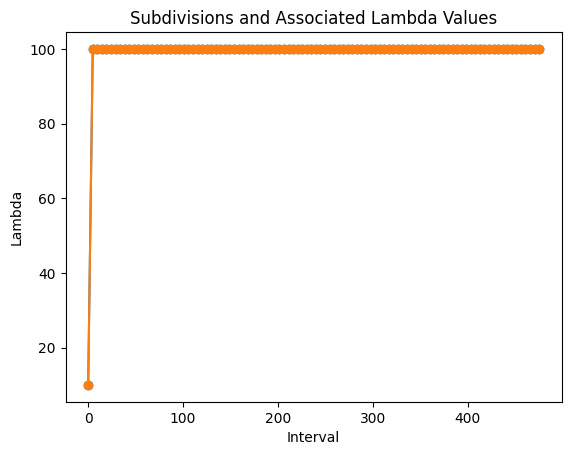

In [42]:
subdivisions = 100 # Number of subdivisions
subdivision_size = 480 / subdivisions 
     

subdivision_bounds = []
lambda_values = []

for i in range(subdivisions):
    left = i * subdivision_size
    right = (i + 1) * subdivision_size

    intensity = 0
    for j, T_480_i in enumerate(T_480_list):
        intensity += point_process_intensity_interval(left, right, T_480_i)
    intensity /= n

    if abs(intensity - lam0) < abs(intensity - lam1):
        lambda_interval = lam0
    else:
        lambda_interval = lam1

    subdivision_bounds.append((left, right))
    lambda_values.append(lambda_interval)


x = []
for left, _ in subdivision_bounds:
    x.append(left)

y = lambda_values
plt.plot(x, y, marker='o')
plt.plot(x, y, marker='o')
plt.xlabel('Interval')
plt.ylabel('Lambda')
plt.title('Subdivisions and Associated Lambda Values')
plt.show()

In [46]:
change_point = None
pv = lam0
for i in range(1, len(subdivision_bounds)):
    cur = lambda_values[i]
    if cur != pv:
        change_point = subdivision_bounds[i][0]
        print("The estimation of the value of tau " + str(tau_1) + " is " + str(change_point))
    pv = cur

The estimation of the value of tau 5.0858860249907165 is 4.8


Once again we find a very good approximation of the time where the electrical shutdown occured with one minute precision. We are very happy with this result. One interesting thing with this method is that it can work even if there are a lot of $\lambda$ (in the case with more than 2 poisson processes). However, this method will not work for poisson processes with variable intensity $\lambda(t)$ especially if $\lambda(t)$ is a continuous function because we can't compare our intensity with anything. 

----

### Extra: A method that we have tried but does not work: Binary search 

The intuition in this part is that if we compare the intensity ($\frac{N_t}{t} $) of two intervals we could choose which interval is more likely to contain $\tau$. 

However, through our expirementations we have seen that if we only use one point process realisation it doesn't work very well. The binary search was often stuck in intervals with no realizations. So, we decided to generate many point processes with the same $\tau$. 


If the intensity ($\frac{N_t}{t} $) in the first interval is lower than the one in the second interval, then $\tau$ is more likely to be in the first interval.

Thanks to the following loop we will implement the binary searsh by searshing recursively through an initial interval and updating its bounds. e stop when we find an interval of length $\epsilon$.

In [48]:
# Parameters
lam0 = 10
lam1 = 100
sigma_1 = 1/45
tau_1 = np.random.exponential(scale = 1 / sigma_1)
n=1000

T_list = [] 
maximum = 0# to store the maximum of all our point processs
for i in range(n): #here we generate n point processes to avoid having intervals with no jumps
    T_i = poisson_process(lam0, lam1, tau_1)
    a = T_i[-1]
    if a > maximum :
        maximum = a
    T_list.append(T_i)  

In [49]:

epsilon = 0.5
left = 0
right = maximum
while abs(right - left) > epsilon:
    mid = (left + right) / 2
    intensity1=0
    intensity2=0
    for i, T_i in enumerate(T_list):
        length = len(T_i)  
        intensity1 += point_process_intensity_interval(left, mid, T_i)
        intensity2 += point_process_intensity_interval(mid, right, T_i)
    intensity1 = intensity1/n
    intensity2 = intensity2/n
    if intensity1 < intensity2:
        right = mid
    else:
        left = mid
    
# Final inferred arrival time window
arrival_window = (left, right)
print("Inferred Arrival Time Window:", arrival_window)
print("and tau is equal to " + str(tau_1))

Inferred Arrival Time Window: (10.035822423899582, 10.322560207439569)
and tau is equal to 32.72009197400248


Even Though, we have taken the mean intensities of many random processes, it doesn't work very well especially when the epsilon is small. We have results that depends a lot on the choice of parameters lam0, lam1, sigma_1. We deduce that binary search is not a very good way to estimate $\tau$, probably because we have $$ \frac{N_t}{t} \rightarrow \lambda$$ and in our case it's quite the opposite with the intervalles times getting smaller and smaller.